In [1]:
print("""\
# *************************************************************************** #
# *************************************************************************** #
# TP6 : BASES DE GROEBNER ET SYSTEMES POLYNOMIAUX MULTIVARIES                 #
# *************************************************************************** #
# *************************************************************************** #
""")

# CONSIGNES
#
# Les seules lignes a modifier sont annoncee par "Code pour l'exercice"
# indique en commmentaire et son signalees
# Ne changez pas le nom des variables
#
# CONSEILS
#
# Ce modele vous sert a restituer votre travail. Il est deconseille d'ecrire
# une longue suite d'instruction et de debugger ensuite. Il vaut mieux tester
# le code que vous produisez ligne apres ligne, afficher les resultats et
# controler que les objets que vous definissez sont bien ceux que vous attendez.
#
# Vous devez verifier votre code en le testant, y compris par des exemples que
# vous aurez fabrique vous-meme.
#


reset()
print("""\
# ****************************************************************************
#  FONCTIONS DE SAGEMATH
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

MPol.<x,y,z> = PolynomialRing(QQ,3, order='lex')
f = 2*x^2*y+7*z^3

# Code pour l'EXERCICE

print(x<y^2)
print(f.lt()) #the leading term of the polynomial f
print(f.lc()) # the leading coefficient of the polynomial f
print(f.lm()) # the leading monomial of the polynomial f

reponse  ="votre reponse ici"

# # Affichage des resultats

print("\n$1/ ", reponse)

# *************************************************************************** #
# *************************************************************************** #
# TP6 : BASES DE GROEBNER ET SYSTEMES POLYNOMIAUX MULTIVARIES                 #
# *************************************************************************** #
# *************************************************************************** #

# ****************************************************************************
#  FONCTIONS DE SAGEMATH
# ****************************************************************************

False
2*x^2*y
2
x^2*y

$1/  votre reponse ici


In [2]:
reset()
print("""\
# ****************************************************************************
# DIVISION MULTIVARIEE
# ****************************************************************************
""")




# Donnees de l'enonce de l'exercice

MPol.<x,y> = PolynomialRing(QQ,2, order='lex')
f  = -x^7 + x^6*y + 2*x^5 - 2*x^4*y - 5*x^2 + 3*x*y^3 + 5*x*y + 11*y^3 + 10 
f1 = x*y^2+2*y^2
f2 = x^5+5

# Code pour l'EXERCICE

def Div(p,F):
    for i in range(len(F)):
        if F[i]!=0:
            if p.lt()%F[i].lt()==0:
                return (True, i)
    return (False,-1)

def myDivision(f,F):
    MPol = f.parent()
    n = MPol.ngens()
    s = len(F)
    Q = [MPol(0)]*s
    r = MPol(0)
    p = f
    while p!=MPol(0):
        test, i = Div(p,F)
        if test:
            Q[i] = Q[i]+p.lt()//F[i].lt()
            p = p - ((p.lt()//F[i].lt())*F[i])
        else:
            r = r + p.lt()
            p = p - p.lt()
    assert(f==sum(q*g for q,g in zip(Q,F) )+r)
    return Q,r

# # Affichage des resultats

print("\n$ ",  myDivision(f,[f1,f2]))

# ****************************************************************************
# DIVISION MULTIVARIEE
# ****************************************************************************


$  ([3*y, -x^2 + x*y + 2], -2*x^4*y + 5*y^3)


In [3]:

print("""\
# ****************************************************************************
# BASE DE GROEBNER
# ****************************************************************************
""")

# Donnees de l'enonce de l'exercice

MPol.<x,y,z> = PolynomialRing(QQ,3, order='lex')
f1 = x^2-y
f2 = x*y-z
f3 = z^4+x*y

# Code pour l'EXERCICE

def myGroebner(F):
    G=F.copy()
    S=[1]
    s = lambda g, h : (lcm(g.lt(),h.lt())//g.lt())*g - (lcm(g.lt(),h.lt())//h.lt())*h
    while S :
        S=[]
        for g in G:
            for h in G:
                r = s(g,h)
                print("g= ",g,"\nh= ", h)
                print("s = ",r)
                _, r = myDivision(r,G)
                if r!=0:
                    S+=[r]
        G+=S
    G=list(set(G))
    return G
    
def testIfRemoveableElement(G):
    for i in range(len(G)):
        g = G[i]
        if g.lt() in Ideal([f.lt() for f in G if f!=g]):
            return (True, i)
    return (False,-1)

def myRedGroebner(F):
    G = myGroebner(F)
    b, i = testIfRemoveableElement(G) 
    while b:
        G.pop(i)
        b, i= testIfRemoveableElement(G)
        while b:
            G.pop(i)
            b, i = testIfRemoveableElement(G)
        for i in range(len(G)):
            G[i] = G[i]/G[i].lc()   
    return G

# # Affichage des resultats

print("\n$1/ ",myGroebner([f1,f2,f3]))
print("\n$2/ ",myRedGroebner([f1,f2,f3]))

# ****************************************************************************
# BASE DE GROEBNER
# ****************************************************************************

g=  x^2 - y 
h=  x^2 - y
s =  0
g=  x^2 - y 
h=  x*y - z
s =  x*z - y^2
g=  x^2 - y 
h=  x*y + z^4
s =  -x*z^4 - y^2
g=  x*y - z 
h=  x^2 - y
s =  -x*z + y^2
g=  x*y - z 
h=  x*y - z
s =  0
g=  x*y - z 
h=  x*y + z^4
s =  -z^4 - z
g=  x*y + z^4 
h=  x^2 - y
s =  x*z^4 + y^2
g=  x*y + z^4 
h=  x*y - z
s =  z^4 + z
g=  x*y + z^4 
h=  x*y + z^4
s =  0
g=  x^2 - y 
h=  x^2 - y
s =  0
g=  x^2 - y 
h=  x*y - z
s =  x*z - y^2
g=  x^2 - y 
h=  x*y + z^4
s =  -x*z^4 - y^2
g=  x^2 - y 
h=  x*z - y^2
s =  x*y^2 - y*z
g=  x^2 - y 
h=  -x*z^4 - y^2
s =  x*y^2 + y*z^4
g=  x^2 - y 
h=  -x*z + y^2
s =  -x*y^2 + y*z
g=  x^2 - y 
h=  -z^4 - z
s =  x^2*z + y*z^4
g=  x^2 - y 
h=  x*z^4 + y^2
s =  -x*y^2 - y*z^4
g=  x^2 - y 
h=  z^4 + z
s =  -x^2*z - y*z^4
g=  x*y - z 
h=  x^2 - y
s =  -x*z + y^2
g=  x*y - z 
h=  x*y - z
s =  0
g= 

In [4]:
print("""\
# ****************************************************************************
# APPARTENANCE A UN IDEAL
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

MPol.<x,y,z> = PolynomialRing(QQ,3, order='lex')
f1 = x*y-y^2
f2 = x^3-z^2
I = Ideal([f1,f2])
f = -4*x^2*y^2*z^2 + y^6 + 3*z^5

# Code pour l'EXERCICE

test1 = f in I
_, r = myDivision(f, I.groebner_basis())
test2 = (r==0)  # A ECRIRE VOUS-MEME


# # Affichage des resultats

print("\n$ Test de Sage ",test1)
print("\n$ Test de personnel ",test2)



# ****************************************************************************
# APPARTENANCE A UN IDEAL
# ****************************************************************************


$ Test de Sage  False

$ Test de personnel  False


# ****************************************************************************
# RESOLUTION D'UN SYSTEME
# ****************************************************************************


$1/  Une base de Groebner de [f,g] est [x^2 - 5*x + y^2 - 5*y + 12, x*y^2 - 5*x*y + 6*x + y^3 - 6*y^2 + 11*y - 6, y^4 - 6*y^3 + 15*y^2 - 26*y + 24]

$2/  Les valeurs de y sont [3, 2]

$4/  Les valeurs de (x,y) sont [(2, 3), (3, 2), (3, 3), (2, 2)]

$4/


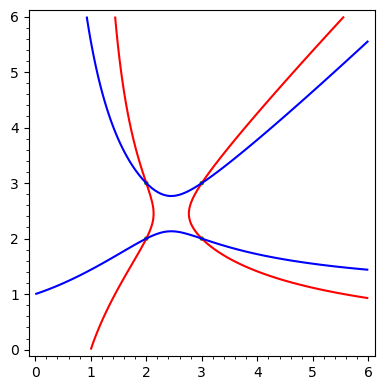

In [5]:
reset()
print("""\
# ****************************************************************************
# RESOLUTION D'UN SYSTEME
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice


MPol.<x,y> = PolynomialRing(QQ,2,order="lex") # QUEL ORDRE DEVEZ-VOUS CHOISIR ?
f = (y^2+6)*(x-1) - y*(x^2 + 1)
g = (x^2+6)*(y-1) - x*(y^2 + 1)
 

# Code pour l'EXERCICE
I = Ideal(f,g)

base = I.groebner_basis() # Vous pouvez utiliser la fonction adhoc de sage
          # pour calculer la base Groebner
racines_y = [y for (y,_) in base[2].univariate_polynomial().roots()] #
racinesf = [(x,racines_y[0]) for (x,_) in f.subs({y:racines_y[0]}).univariate_polynomial().roots()]+ [(x,racines_y[1]) for (x,_) in f.subs({y:racines_y[1]}).univariate_polynomial().roots()]
racinesg = [(x,racines_y[0]) for (x,_) in g.subs({y:racines_y[0]}).univariate_polynomial().roots()]+ [(x,racines_y[1]) for (x,_) in g.subs({y:racines_y[1]}).univariate_polynomial().roots()]
racinesf = set(racinesf)
racinesg = set(racinesg)
racines  = [(x,y) for (x,y) in racinesf if (x,y) in racinesg]

Gf = implicit_plot(f,(x,0,6),(y,0,6),color='red') 
Gg = implicit_plot(g,(x,0,6),(y,0,6),color='blue')  
Gp = point2d(racines,color='green')

# # Affichage des resultats

print("\n$1/  Une base de Groebner de [f,g] est", base)
print("\n$2/  Les valeurs de y sont", racines_y)
print("\n$4/  Les valeurs de (x,y) sont", racines)
print("\n$4/")
show(Gf+Gg+Gp)


In [6]:
print("""\
# ****************************************************************************
# OPTIMISATION
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice


MPol.<x,y,lamb> = PolynomialRing(QQ,3,order='invlex') # QUEL ORDRE DEVEZ-VOUS CHOISIR ?
f = x^2*y  - 2*x*y + y + 1
g = x^2 + y^2 - 1


# Code pour l'EXERCICE

gradf = vector(MPol,[f.derivative(x),f.derivative(y)])
gradg = vector(MPol,[lamb*g.derivative(x),lamb*g.derivative(y)])

print(gradf, gradg)

syst = [gradg[0]-gradf[0],gradg[1]-gradf[1],g]
I = Ideal(syst)
base = I.groebner_basis()
racines=[]
x_possibles = [xx  for (xx,_) in base[2].univariate_polynomial().roots(RR)]
y_x_possibles = [(xx,yy) for xx in x_possibles for yy,_ in base[1].subs({x:xx}).univariate_polynomial().roots(RR)]
racines=[(xx,yy) for (xx,yy) in y_x_possibles for l,_ in base[0].subs({x:xx,y:yy}).univariate_polynomial().roots(RR)]


# # Affichage des resultats


print("\n$1/  On doit resoudre le systeme", syst)
print("\n$2/  dont une base de Groebner est", base)
print("\n$4/  Les valeurs de (x,y) sont", racines)

# ****************************************************************************
# OPTIMISATION
# ****************************************************************************

(2*x*y - 2*y, x^2 - 2*x + 1) (2*x*lamb, 2*y*lamb)

$1/  On doit resoudre le systeme [2*x*lamb - 2*x*y + 2*y, 2*y*lamb - x^2 + 2*x - 1, y^2 + x^2 - 1]

$2/  dont une base de Groebner est [lamb - 3/2*x^2*y + 2*x*y - 1/2*y, y^2 + x^2 - 1, x^3 - 4/3*x^2 - 1/3*x + 2/3]

$4/  Les valeurs de (x,y) sont [(-0.666666666666667, -0.745355992499930), (-0.666666666666667, 0.745355992499930)]


In [7]:
print("""\
# ****************************************************************************
# MANIPULATIONS ALGEBRIQUES
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

# Code pour l'EXERCICE
MPol.<x,y,u,v> = PolynomialRing(QQ,4,order='degrevlex')
# x represents cos(theta), y represents sin(theta)
f1=x+y - u
f2=x^2 - y^2 + 2*x*y - v
f3= x^2 + y^2 - 1
I = Ideal(f1,f2,f3)
formule = I.reduce(y^6)

# # Affichage des resultats

print("\n$1/ ",formule)

# ****************************************************************************
# MANIPULATIONS ALGEBRIQUES
# ****************************************************************************


$1/  1/16*u^2*v^2 - 3/8*u^2*v + 7/16*u^2 + 1/8*v^2 - 1/8*v - 1/8


# ****************************************************************************
# OVALES DE DESCARTES
# ****************************************************************************


$ L'équation est  y^4 + 2*x^2*y^2 - 16/3*x*y^2 - 22/3*y^2 + x^4 - 16/3*x^3 - 2/9*x^2 + 80/9*x + 25/9


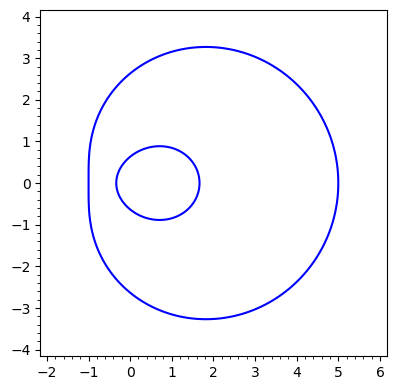

In [8]:
print("""\
# ****************************************************************************
# OVALES DE DESCARTES
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice


# Code pour l'EXERCICE

MPol.<x,y,w,z> = PolynomialRing(QQ,4,order='invlex')
f1 = w+2*z-3
f2 = w^2 - (x^2 + y^2)
f3 = z^2 - ((x-1)^2 + y^2)
I = Ideal(f1,f2,f3)
base = I.groebner_basis()
# Code pour l'EXERCICE

eq = base[-1]

# # Affichage des resultats

MPol2.<x,y> = PolynomialRing(QQ,2,order='lex')

# # Affichage des resultats

print("\n$ L'équation est ",eq)
implicit_plot(MPol2(eq),(x,-2,6),(y,-4,4))